# Environment Setup

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as mc
import statsmodels.stats.api as sms
import scipy.stats
import copy

from scipy.stats import f_oneway
from statsmodels.formula.api import glm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../data/hour.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


# Data Cleaning/Preparation

## Drop unneeded columns

Instant column is an index of the column for the registration index. Will drop the column because it is not needed and will use the same index for all the other columns.
dteday is also not needed. Since we need to answer the question based on season, we will not use this variable.

In [6]:
df = df.drop(['instant', 'dteday'], axis=1)

In [7]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
df.shape

(17379, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


## Fixing the data types
All variables are Integer are valid data type except for season	yr,	mnth, hr, holiday, weekday	workingday, weathersit. They should be treated as a category.


In [10]:
df["season"] = df["season"].astype('category')
df["yr"] = df["yr"].astype('category')
df["mnth"] = df["mnth"].astype('category')
df["holiday"] = df["holiday"].astype('category')
df["weekday"] = df["weekday"].astype('category')
df["workingday"] = df["workingday"].astype('category')
df["weathersit"] = df["weathersit"].astype('category')


Hour of the day has a natural ordering - 9am is closer to 10am or 8am than it is to 6pm. It is best thought of as a discrete ordinal variable. We will treat it as characteristic of being cyclic.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  int64   
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
dtypes: category(7), float64(4), int64(4)
memory usage: 1.2 MB


In [12]:
df.isna().sum()   #null value check

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507
casual,17379.0,35.676218,49.305030,0.00,4.0000,17.0000,48.0000,367.0000
registered,17379.0,153.786869,151.357286,0.00,34.0000,115.0000,220.0000,886.0000
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000


# Exploratory Data Analysis

Analysis:

According to the kernel density estimation (see histogram below), we conclude an approximate normal distribution with slight skew to the right. The mean of the distribution is 0.4969871684216583. The standard deviation is 6.534. The range is -6.038 - 7.0.

The mean of a distribution tells you the central or 'average' value of your data set. The mean value of 0.4969871684216583 indicates that on average, the values in your data set are close to this number.
The standard deviation (SD) is a measure of how spread out the numbers in the data set are. A low SD indicates that the data points tend to be close to the mean, while a high SD indicates that the data are spread out over a larger range of values. The SD of 6.534 is fairly high, suggesting that the data points are quite dispersed around the mean.
The range -6.038 to 7.0 tells you the spread of your data, which is the difference between the smallest and the largest observed value.
Given that your kernel density estimation suggests an approximate normal distribution, this suggests that the data are symmetrically distributed around the mean (though with a slight skew to the right). The fact that it's only an approximate normal distribution and that there's a slight skew to the right suggests that there are slightly more values that are greater than the mean than less than it.

In [14]:
# Perform encoding on column season
df_enc = pd.get_dummies(df, columns = ['season'])

## Simple Linear Regression

In [15]:
# univariate analysis
X1 = df_enc['temp']
y = df_enc['cnt']

# use stats models for basic linear regression
X1 = sm.add_constant(X1) # adds constant to the model
model = sm.OLS(y, X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     3405.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:00:29   Log-Likelihood:            -1.1349e+05
No. Observations:               17379   AIC:                         2.270e+05
Df Residuals:                   17377   BIC:                         2.270e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0356      3.483     -0.010      0.992      -6.862       6.791
temp         381.2949      6.534     58.352      0.000     368.487     394.103
==============================================================================
Omnibus:                     3140.760   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5634.907
Skew:                           1.152   Prob(JB):                         0.00
Kurtosis:                       4.572   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df_enc['temp'].mean()

0.4969871684216583

## Multiple Linear Regression

In [17]:
# assign independent variables, dependent variable, respectively
# x = df_enc.loc[:, df_enc.columns != 'cnt']
x = df_enc[['temp','season_1','season_2','season_3','season_4','hum']]
# define the target
y = pd.DataFrame(df_enc['cnt'])


In [18]:
# Divide data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=42)

In [19]:
# Train model
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     946.8
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:00:29   Log-Likelihood:                -78628.
No. Observations:               12165   AIC:                         1.573e+05
Df Residuals:                   12159   BIC:                         1.573e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.5393      6.712     17.662      0.000     105.384     131.695
temp         450.6598     11.960     37.682      0.000     427.217     474.103
season_1      25.4229      2.757      9.222      0.000      20.019      30.827
season_2      24.7096      3.285      7.522      0.000      18.270      31.149
season_3     -16.7054      4.712     -3.546      0.000     -25.941      -7.470
season_4      85.1122      2.819     30.192      0.000      79.586      90.638
hum         -287.8966      7.526    -38.255      0.000    -302.648    -273.145
==============================================================================
Omnibus:                     2441.169   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4792.801
Skew:                           1.216   Prob(JB):                         0.00
Kurtosis:                       4.882   Cond. No.                     9.69e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.47e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Dependent Variable: The dependent variable is 'cnt' (count).

R-squared: The R-squared value indicates the proportion of the variance in the dependent variable explained by the independent variables. In this case, the R-squared value is 1.000, which suggests that the independent variables in the model can perfectly explain the variation in the dependent variable.

Adj. R-squared: The adjusted R-squared value is a modified version of R-squared that accounts for the number of predictors in the model. The adjusted R-squared value of 1.000 indicates a perfect fit of the model.

F-statistic: The F-statistic is used to test the overall significance of the regression model. In this case, the F-statistic is extremely large (1.041e+32), indicating that the model is highly significant.

P-values: The P-values associated with each coefficient represent the probability of observing a coefficient as extreme as the one estimated if the null hypothesis (no relationship) is true. The P-values help determine the statistical significance of each independent variable. Variables with P-values less than the chosen significance level (typically 0.05) are considered statistically significant. In this output, some variables have P-values less than 0.05, indicating they are statistically significant, while others have higher P-values.

Coefficients: The coefficients represent the estimated effect of each independent variable on the dependent variable. The values in the 'coef' column indicate the estimated coefficients, while the 'std err' column provides the standard errors associated with those estimates.

Confidence Intervals: The values in the '[0.025 0.975]' column represent the 95% confidence intervals for the corresponding coefficients. The confidence intervals provide a range within which we can be reasonably confident that the true population value lies.

Based on the information provided, it appears that the model has a perfect fit, which could indicate potential issues such as perfect multicollinearity or overfitting. It is recommended to review the data, the model specification, and the results carefully to ensure the validity and interpretability of the regression analysis.

## Correlation Matrix

Given the outputs of the correlation matrix we can see the highest levels of variations in fall at 0.64 between temp and cnt. In spring, we see a -0.58 correlation matrix between temp and cnt,
As temp goes down, count goes down as temp goes up count goes up. 

TODO: Connect mean temperature from histogram or range with fall's correlation between temp and cnt. 
Connect low bike usage with spring's correlation between temp and cnt.

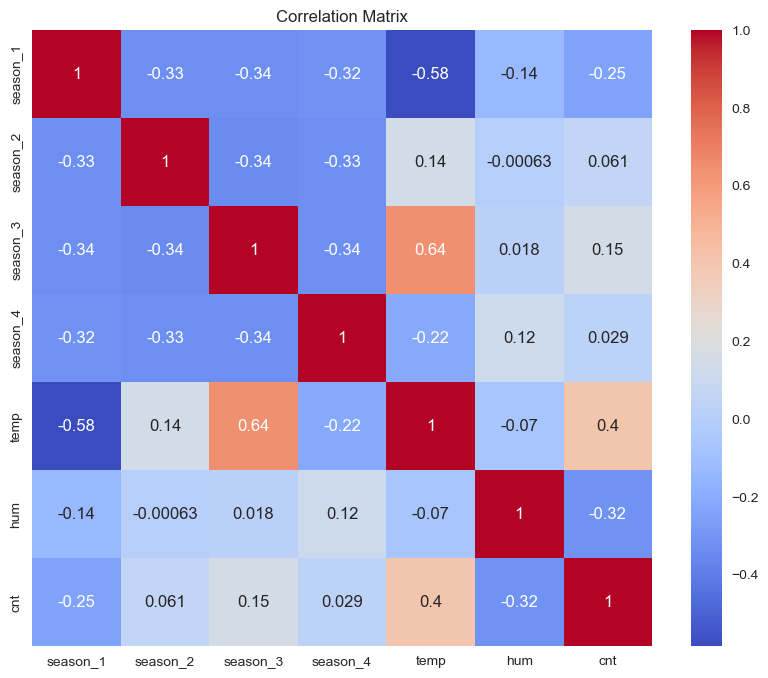

In [20]:
# Select the columns for correlation analysis
columns = ['season_1', 'season_2', 'season_3', 'season_4', 'temp', 'hum', 'cnt']

# Create a subset of the DataFrame with selected columns
subset = df_enc[columns]

# Compute the correlation matrix
correlation_matrix = subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Boxplot & Histogram with KDE

In [21]:
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """
    Boxplot and histogram combined.

    Parameters:
    - feature: 1-D feature array
    - figsize: size of the figure (default: (15, 10))
    - bins: number of bins for histogram (default: None/auto)

    Returns:
    - None
    """

    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    sns.boxplot(feature, ax=ax_box, showmeans=True, color='violet')
    
    if bins:
        sns.histplot(feature, kde=True, ax=ax_hist, bins=bins, palette="winter")
    else:
        sns.histplot(feature, kde=True, ax=ax_hist)
    
    ax_hist.axvline(np.mean(feature), color='green', linestyle='--')
    ax_hist.axvline(np.median(feature), color='black', linestyle='-')


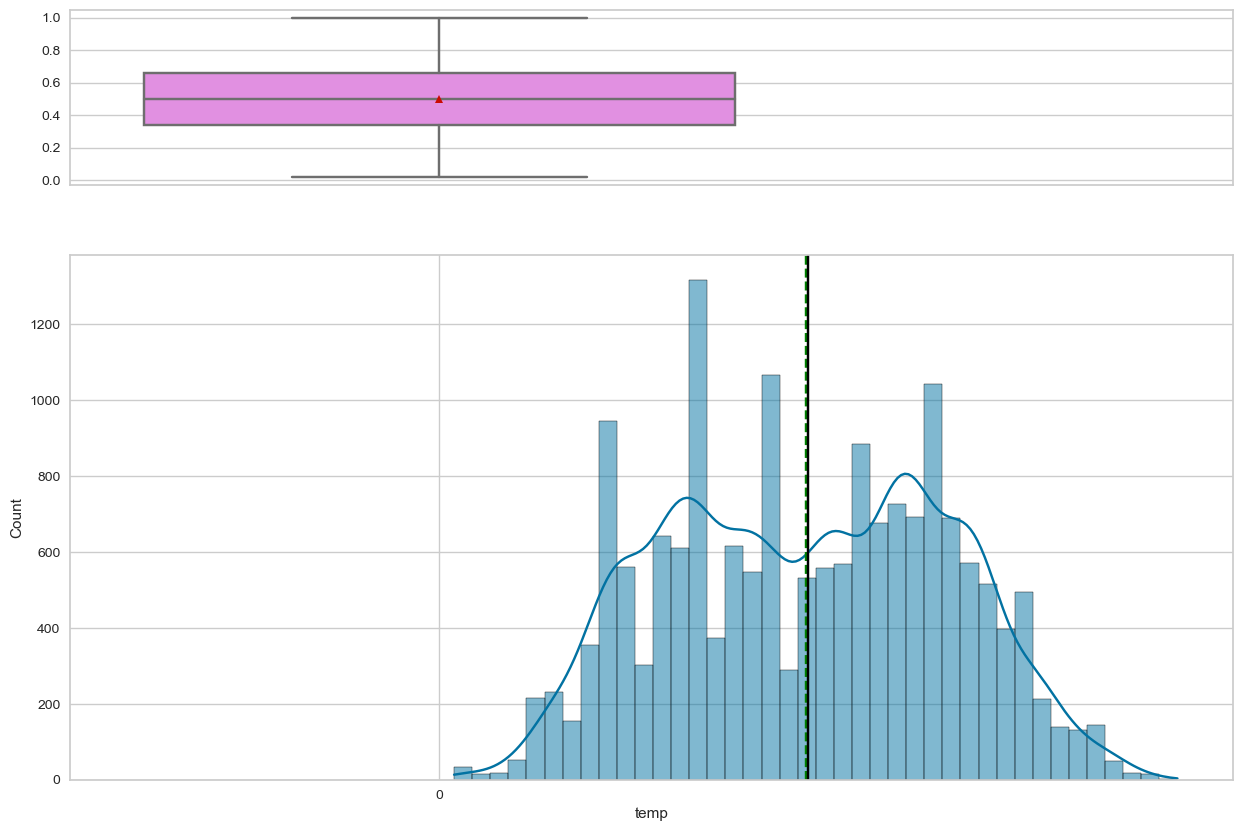

In [22]:
histogram_boxplot(df_enc["temp"])

# Significance Testing

The null hypothesis is that the rental bike usage is the same between across all seasons, meaning that season does not have an effect on bike usage. After executing an ANOVA test, the F-Statistic is approximately $409.18$ with a p-value of $0$. There is reasonable evidence to reject the null hypothesis and assume that seasons have an effect on rental bike usage.

$H_0: c_1 = c_2 = c_3 = c_4 $

## ANOVA Test (F-Test with statsmodels)

In [23]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [24]:
df_enc.head()

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4
0,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0
1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0
2,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0
3,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0
4,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0


In [25]:
# Run ANOVA test
fit = smf.ols(formula='cnt ~ C(season)', data=df).fit()
aov_table = sm.stats.anova_lm(fit)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,3.772936e+07,1.257645e+07,409.181037,7.401071e-257
Residual,17375.0,5.340322e+08,3.073567e+04,NaN,NaN


## F-Test using scipy

In [26]:
# F-Test
group1 = df['cnt'].loc[df['season'] == 1]
group2 = df['cnt'].loc[df['season'] == 2]
group3 = df['cnt'].loc[df['season'] == 3]
group4 = df['cnt'].loc[df['season'] == 4]
 
# Conduct the one-way ANOVA
f_stat, p_value = f_oneway(group1, group2, group3, group4)

In [27]:
print(f'F-Statistic: {f_stat}')
print(f'p_value: {p_value}')

F-Statistic: 409.1810372630525
p_value: 7.40107139971279e-257
